<a href="https://colab.research.google.com/github/violet417/violet417/blob/main/2MD%EA%B8%B0%EC%B4%88_04_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5%EC%97%90_%ED%95%84%EC%9A%94%ED%95%9C_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B0%80%EA%B3%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 지도학습
- 문제와 답을 같이 학습함으로써 미지의 문제에 대한 올바른 답을 예측하고자 하는 방법
- 병렬계산이 가능해야 하기 때문에 행렬 모양 이어야 한다. 
- 문제집: 2차원 행렬    
- 정답지: 1차원 행렬  

In [ ]:
import pandas as pd

In [ ]:
fish = pd.read_csv('fish.csv')
fish    # class 1: 도미 // 0: 빙어

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


In [ ]:
bream = fish[fish['class'] == 1]    # 도미: fish에 접근 -> fish의 'class'가 1인 것만 가져오기
bream

,length,weight,class
0,25.4,242.0,1
1,26.3,290.0,1
2,26.5,340.0,1
3,29.0,363.0,1
4,29.0,430.0,1
5,29.7,450.0,1
6,29.7,500.0,1
7,30.0,390.0,1
8,30.0,450.0,1
9,30.7,500.0,1


In [ ]:
smelt = fish[fish['class']  == 0]    # 빙어: fish에 접근 -> fish의 'class'가 0인 것만 가져오기
smelt

,length,weight,class
35,9.8,6.7,0
36,10.5,7.5,0
37,10.6,7.0,0
38,11.0,9.7,0
39,11.2,9.8,0
40,11.3,8.7,0
41,11.8,10.0,0
42,11.8,9.9,0
43,12.0,9.8,0
44,12.2,12.2,0


In [ ]:
bream_length = list(bream['length'])    # 시리즈 = 벡터 
bream_weight = list(bream['weight'])    # 병렬계산이 되지 않도록 리스트로 묶어줌
                                        # 전처리 후 다시 행렬로 바꿔줄 예정
smelt_length = list(smelt['length'])
smelt_weight = list(smelt['weight'])

In [ ]:
print(bream_length)
print(smelt_length)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
[9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [ ]:
print(bream_weight)
print(smelt_weight)

[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]
[6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


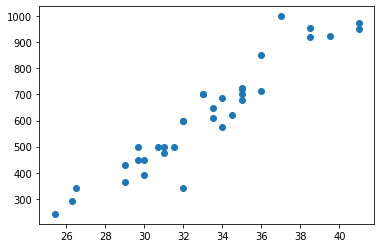

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(bream_length, bream_weight)    # x축=길이, y축=무게

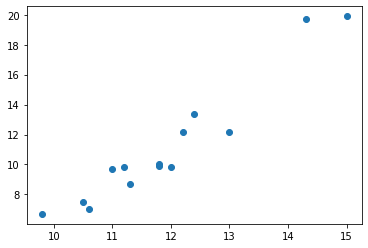

In [ ]:
plt.scatter(smelt_length, smelt_weight)

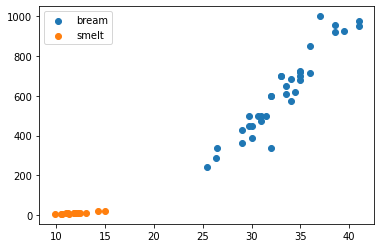

In [ ]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.legend(['bream', 'smelt'])

In [ ]:
# 문제집(2차원 행렬): 길이, 무게
# 정답지(1차원 행렬): 도미, 빙어(생선 종류)
# 도미: 35마리, 빙어: 14마리 = 49마리

length = bream_length + smelt_length    # 길이데이터를 하나로 묶기
print(length)

[25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]


In [ ]:
weight = bream_weight + smelt_weight    # 무게데이터를 하나로 묶기
print(weight)

[242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]


In [ ]:
data = []

for i in range(49):    # 데이터가 총 49개이므로.
    data.append([length[i], weight[i]])    # 길이와 무게를 하나로 묶어줌. 

data    # 2차원 리스트(리스트 안에 리스트)

[[25.4, 242.0],
 [26.3, 290.0],
 [26.5, 340.0],
 [29.0, 363.0],
 [29.0, 430.0],
 [29.7, 450.0],
 [29.7, 500.0],
 [30.0, 390.0],
 [30.0, 450.0],
 [30.7, 500.0],
 [31.0, 475.0],
 [31.0, 500.0],
 [31.5, 500.0],
 [32.0, 340.0],
 [32.0, 600.0],
 [32.0, 600.0],
 [33.0, 700.0],
 [33.0, 700.0],
 [33.5, 610.0],
 [33.5, 650.0],
 [34.0, 575.0],
 [34.0, 685.0],
 [34.5, 620.0],
 [35.0, 680.0],
 [35.0, 700.0],
 [35.0, 725.0],
 [35.0, 720.0],
 [36.0, 714.0],
 [36.0, 850.0],
 [37.0, 1000.0],
 [38.5, 920.0],
 [38.5, 955.0],
 [39.5, 925.0],
 [41.0, 975.0],
 [41.0, 950.0],
 [9.8, 6.7],
 [10.5, 7.5],
 [10.6, 7.0],
 [11.0, 9.7],
 [11.2, 9.8],
 [11.3, 8.7],
 [11.8, 10.0],
 [11.8, 9.9],
 [12.0, 9.8],
 [12.2, 12.2],
 [12.4, 13.4],
 [13.0, 12.2],
 [14.3, 19.7],
 [15.0, 19.9]]

In [ ]:
target = [1] * 35 + [0] * 14    # 정답지
print(target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
import numpy as np

data = np.array(data)
data    # 행렬로 바꿔줌

array([[  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],


In [ ]:
target = np.array(target)
target  # 1차원 행렬

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])